<a href="https://colab.research.google.com/github/freud-sensei/imfine_torch/blob/main/%5B%EC%96%B4%EB%91%A0%EC%86%8D%EC%9D%98%ED%9A%83%EB%B6%88%5D_GRU%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_IMDB_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드 및 단어 토큰화

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import torch
import urllib.request
from tqdm import tqdm
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/pytorch-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/IMDB%20Dataset.csv", filename="IMDB Dataset.csv")

('IMDB Dataset.csv', <http.client.HTTPMessage at 0x7a02c0f3a2f0>)

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# non-null 값을 보여준다는 점에서 결측치가 없음을 알 수 있음.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<Axes: >

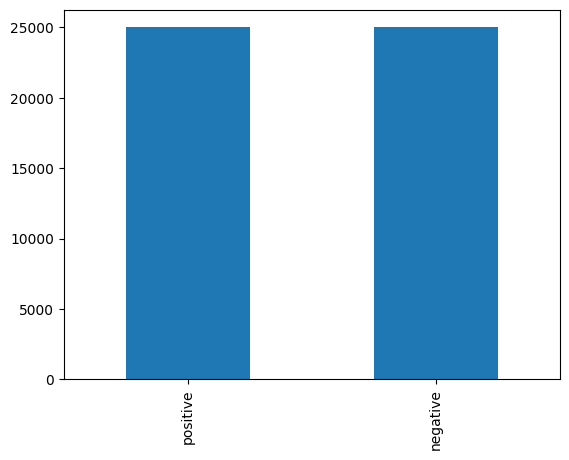

In [ ]:
df['sentiment'].value_counts().plot(kind='bar')

In [ ]:
print('레이블 개수')
print(df['sentiment'].value_counts())

레이블 개수
positive    25000
negative    25000
Name: sentiment, dtype: int64


In [ ]:
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
X_data = df['review']
y_data = df['sentiment']
print(len(X_data))
print(len(y_data))

50000
50000


* 훈련 데이터 / 테스트 데이터를 5:5 비율로 나누고
* 훈련 데이터를 다시 8:2 비율로 훈련, 검증 데이터로 나누기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.5, random_state=0, stratify=y_data)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=0, stratify=y_train)

In [ ]:
# 토큰화
def tokenize(sentences):
  tokenized_sentences = []
  for s in tqdm(sentences):
    tokenized_s = word_tokenize(s)
    tokenized_s = [word.lower() for word in tokenized_s]
    tokenized_sentences.append(tokenized_s)
  return tokenized_sentences

tokenized_X_train = tokenize(X_train)
tokenized_X_valid = tokenize(X_valid)
tokenized_X_test = tokenize(X_test)

100%|██████████| 25000/25000 [00:42<00:00, 584.52it/s]


In [ ]:
for s in tokenized_X_train[:2]:
  print(s)

['have', 'you', 'ever', ',', 'or', 'do', 'you', 'have', ',', 'a', 'pet', 'who', "'s", 'been', 'with', 'you', 'through', 'thick', 'and', 'thin', ',', 'who', 'you', "'d", 'be', 'lost', 'without', ',', 'and', 'who', 'you', 'love', 'no', 'matter', 'what', '?', 'betcha', 'never', 'thought', 'they', 'feel', 'the', 'same', 'way', 'about', 'you', '!', '<', 'br', '/', '>', '<', 'br', '/', '>', 'wonderful', ',', 'wonderful', 'family', 'film', '.', 'if', 'you', 'have', 'a', 'soft', 'spot', 'for', 'animals', ',', 'this', 'is', 'guaranteed', 'to', 'make', 'you', 'cry', 'no', 'matter', 'your', 'age', '.', 'i', 'used', 'to', 'watch', 'this', 'movie', 'all', 'the', 'time', 'when', 'i', 'was', 'a', 'little', 'kid', ',', 'and', 'i', 'find', 'that', 'now', ',', 'at', 'age', 'sixteen', ',', 'i', 'love', 'it', 'as', 'much', 'as', 'i', 'did', 'then', '.', 'i', 'could', 'never', 'decide', 'on', 'a', 'favorite', 'character', 'then', ',', 'and', 'i', 'still', 'do', "n't", 'think', 'i', 'can', '!', 'i', 'love',

# 단어 집합 만들기

In [ ]:
word_list = [word for sent in tokenized_X_train for word in sent]
word_counts = Counter(word_list)
print(len(word_counts)) # 총 단어수

100586


In [ ]:
word_counts['abysmal'], word_counts['terrible'], word_counts['worst']

(73, 1302, 2090)

In [ ]:
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print(vocab[:10])

['the', ',', '.', 'a', 'and', 'of', 'to', 'is', '/', '>']


In [ ]:
threshold = 3
total_count = len(word_counts) # 단어의 수
rare_count = 0 # 등장 빈도 < 3
total_freq = 0 # 훈련데이터의 전체 단어 빈도수 총합
rare_freq = 0 # 등장 빈도수가 3보다 적은 단어 빈도수 총합

In [ ]:
for key, value in word_counts.items():
  total_freq += value
  if value < threshold:
    rare_count += 1
    rare_freq += value

print(total_count, rare_count)
print(rare_count / total_count * 100) # 희귀단어의 비율
print(rare_freq / total_freq * 100) # 희귀단어의 등장빈도비율

100586 61877
61.51651323245779
1.3294254426463437


In [ ]:
vocab_size = total_count - rare_count
vocab = vocab[:vocab_size]
print(len(vocab))

38709


In [ ]:
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

for index, word in enumerate(vocab):
  word_to_index[word] = index

index_to_word = dict((v, k) for k, v in word_to_index.items())
vocab_size = len(word_to_index)

In [ ]:
print(vocab_size)

38711


# 정수 인코딩

In [ ]:
def texts_to_sequences(tokens, word_to_index):
  encoded = []
  for sent in tokens:
    indices = []
    for word in sent:
      try:
        indices.append(word_to_index[word])
      except KeyError:
        indices.append(word_to_index['<UNK>'])
    encoded.append(indices)
  return encoded

enc_X_train = texts_to_sequences(tokenized_X_train, word_to_index)
enc_X_valid = texts_to_sequences(tokenized_X_valid, word_to_index)
enc_X_test = texts_to_sequences(tokenized_X_test, word_to_index)

In [ ]:
for sent in enc_X_train[:2]:
  print(sent)

[36, 27, 138, 1, 50, 52, 27, 36, 1, 3, 3404, 45, 17, 93, 20, 27, 159, 4057, 4, 1739, 1, 45, 27, 291, 37, 467, 216, 1, 4, 45, 27, 132, 69, 530, 59, 57, 25182, 128, 212, 42, 247, 0, 187, 112, 56, 27, 39, 10, 11, 8, 9, 10, 11, 8, 9, 382, 1, 382, 251, 24, 2, 55, 27, 36, 3, 2278, 1585, 21, 1475, 1, 15, 7, 5773, 6, 109, 27, 1438, 69, 530, 139, 675, 2, 14, 341, 6, 124, 15, 22, 41, 0, 73, 61, 14, 18, 3, 135, 536, 1, 4, 14, 170, 16, 162, 1, 40, 675, 12073, 1, 14, 132, 12, 19, 87, 19, 14, 81, 108, 2, 14, 92, 128, 1122, 28, 3, 492, 119, 108, 1, 4, 14, 143, 52, 29, 118, 14, 71, 39, 14, 132, 41, 299, 5, 0, 1475, 2, 0, 423, 202, 64, 166, 4, 3962, 1, 48, 3, 1959, 1, 23, 19697, 251, 2, 14, 52, 132, 578, 1, 4, 103, 40, 0, 150, 34, 542, 16, 34, 53, 3, 251, 40, 245, 2, 931, 1, 419, 1, 23, 38, 225, 405, 16, 15, 7, 963, 6, 37, 3, 251, 24, 1, 4, 12, 17324, 16, 231, 870, 2, 7998, 53, 51, 0, 414, 4965, 5, 31, 1, 30, 4, 2667, 7, 0, 414, 1, 2142, 6, 0, 206, 1, 8986, 13006, 10, 11, 8, 9, 10, 11, 8, 9, 0, 1475, 1

In [ ]:
print(' '.join([index_to_word[idx] for idx in enc_X_train[0]]))

have you ever , or do you have , a pet who 's been with you through thick and thin , who you 'd be lost without , and who you love no matter what ? betcha never thought they feel the same way about you ! < br / > < br / > wonderful , wonderful family film . if you have a soft spot for animals , this is guaranteed to make you cry no matter your age . i used to watch this movie all the time when i was a little kid , and i find that now , at age sixteen , i love it as much as i did then . i could never decide on a favorite character then , and i still do n't think i can ! i love all three of the animals . the dialogue seems very real and comfortable , like a loving , but feuding family . i do love chance , and how at the end he says that he has a family at last . cheesy , yes , but one must remember that this is meant to be a family film , and it fulfills that role perfectly . sassy has just the perfect dose of `` , '' and shadow is the perfect , model to the young , adventurous chance. <

# 패딩

2818
279.1958


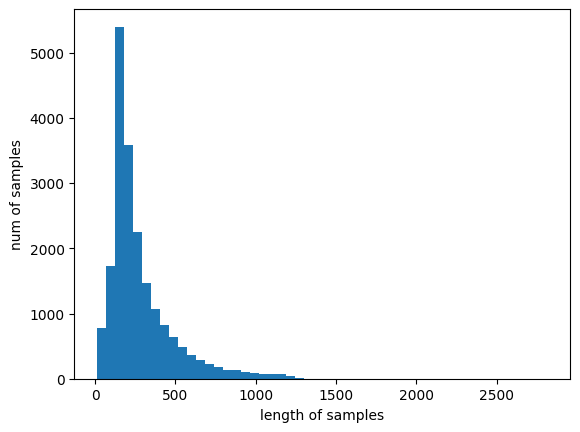

In [ ]:
print(max(len(review) for review in enc_X_train))
print(sum(len(review) for review in enc_X_train) / len(enc_X_train))
plt.hist([len(review) for review in enc_X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('num of samples')
plt.show()

In [ ]:
def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for idx, sent in enumerate(sentences):
    if len(sent) != 0:
      features[idx, :len(sent)] = np.array(sent)[:max_len]
  return features

max_len = 500

pad_X_train = pad_sequences(enc_X_train, max_len=max_len)
pad_X_valid = pad_sequences(enc_X_valid, max_len=max_len)
pad_X_test = pad_sequences(enc_X_test, max_len=max_len)

# 모델링

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
print(device)

cuda


In [ ]:
y_train

8452     1
43937    1
46799    0
21596    0
16796    0
        ..
6646     1
46587    1
48521    1
42288    0
12821    1
Name: sentiment, Length: 20000, dtype: int64

In [ ]:
y_train = torch.tensor(np.array(y_train))
y_valid = torch.tensor(np.array(y_valid))
y_test = torch.tensor(np.array(y_test))
print(y_train[:5])

tensor([1, 1, 0, 0, 0])


* 입력: (배치 크기, 문장 길이)
* 임베딩 층 이후: (배치 크기, 문장 길이, 임베딩벡터의 차원)
* GRU 이후: (배치 크기, 은닉 상태의 차원) [마지막 시점만 고려]
* 출력층: (배치 크기, 분류하고자 하는 카테고리의 수)

In [ ]:
class TextClassifier(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
    self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    # x: (batch_size, seq_length)
    embedded = self.embedding(x) # (batch_size, seq_length, embedding_dim)
    gru_out, hidden = self.gru(embedded)
    # gru_out: (batch_size, seq_length, hidden_dim)
    # hidden: (1[layers], batch_size, hidden_dim)
    last_hidden = hidden.squeeze(0) # 따로 지정하면 해당 차원만 squeeze해 줌. (batch_size, hidden_dim)
    logits = self.fc(last_hidden) # (batch_size, output_dim)
    return logits

In [ ]:
X_train = torch.tensor(pad_X_train).to(torch.int64)
train_ds = torch.utils.data.TensorDataset(X_train, y_train)
train_dl = torch.utils.data.DataLoader(train_ds, shuffle=True, batch_size=32)

X_test = torch.tensor(pad_X_test).to(torch.int64)
test_ds = torch.utils.data.TensorDataset(X_test, y_test)
test_dl = torch.utils.data.DataLoader(test_ds, shuffle=True, batch_size=1)

X_valid = torch.tensor(pad_X_valid).to(torch.int64)
valid_ds = torch.utils.data.TensorDataset(X_valid, y_valid)
valid_dl = torch.utils.data.DataLoader(valid_ds, shuffle=True, batch_size=1)

In [ ]:
embedding_dim = 100
hidden_dim = 128
output_dim = 2
learning_rate = .01
num_epochs = 10

model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)
model.to(device)

TextClassifier(
  (embedding): Embedding(38711, 100)
  (gru): GRU(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [ ]:
loss_f = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=.001)

# 평가 코드 작성

In [ ]:
def calc_accuracy(logits, labels):
  _, predicted = torch.max(logits, 1)
  correct = (predicted == labels).sum().item()
  total = labels.size(0)
  accuracy = correct / total
  return accuracy

In [ ]:
def evaluate(model, valid_dl, loss_f, device):
  val_loss = 0
  val_correct = 0
  val_total = 0

  model.eval()
  with torch.no_grad():
    for batch_X, batch_y in tqdm(valid_dl):
      batch_X, batch_y = batch_X.to(device), batch_y.to(device)
      logits = model(batch_X)
      loss = loss_f(logits, batch_y)
      val_loss += loss.item()
      val_correct += calc_accuracy(logits, batch_y) * batch_y.size(0)
      val_total += batch_y.size(0)
  val_accuracy = val_correct / val_total
  val_loss /= len(valid_dl)

  return val_loss, val_accuracy

# 학습

In [ ]:
n_epochs = 5
best_val_loss = float('inf')

for epoch in range(n_epochs):
  train_loss = 0
  train_correct = 0
  train_total = 0
  model.train()

  for batch_X, batch_y in tqdm(train_dl):
    batch_X, batch_y = batch_X.to(device), batch_y.to(device)
    logits = model(batch_X)
    loss = loss_f(logits, batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    train_correct += calc_accuracy(logits, batch_y) * batch_y.size(0)
    train_total += batch_y.size(0)

  train_accuracy = train_correct / train_total
  train_loss /= len(train_dl)

  val_loss, val_accuracy = evaluate(model, valid_dl, loss_f, device)

  print(f"Epoch {epoch + 1} / {n_epochs}")
  print(f"Train Loss: {train_loss: .4f}, Train Accuracy: {train_accuracy: .4f}")
  print(f"Validation Loss: {val_loss: .4f}, Validation Accuracy: {val_accuracy: .4f}")

  if val_loss < best_val_loss:
    print(f"Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}")
    best_val_loss = val_loss
    torch.save(model.state_dict(), 'best_model_checkpoint.pth')


100%|██████████| 5000/5000 [00:09<00:00, 509.71it/s]


Epoch 1 / 5
Train Loss:  0.0353, Train Accuracy:  0.9895
Validation Loss:  0.4790, Validation Accuracy:  0.8798
Validation loss improved from inf to 0.4790


100%|██████████| 5000/5000 [00:07<00:00, 686.57it/s]


Epoch 2 / 5
Train Loss:  0.0252, Train Accuracy:  0.9925
Validation Loss:  0.5302, Validation Accuracy:  0.8726


100%|██████████| 5000/5000 [00:07<00:00, 698.58it/s]


Epoch 3 / 5
Train Loss:  0.0200, Train Accuracy:  0.9943
Validation Loss:  0.5873, Validation Accuracy:  0.8668


100%|██████████| 5000/5000 [00:07<00:00, 710.50it/s]


Epoch 4 / 5
Train Loss:  0.0123, Train Accuracy:  0.9968
Validation Loss:  0.6011, Validation Accuracy:  0.8724


100%|██████████| 5000/5000 [00:07<00:00, 713.82it/s]

Epoch 5 / 5
Train Loss:  0.0105, Train Accuracy:  0.9974
Validation Loss:  0.5411, Validation Accuracy:  0.8654


# 모델 로드 및 평가

In [ ]:
model.load_state_dict(torch.load('best_model_checkpoint.pth'))
model.to(device)

test_loss, test_accuracy = evaluate(model, test_dl, loss_f, device)
print(test_loss)
print(test_accuracy)

100%|██████████| 25000/25000 [00:38<00:00, 649.38it/s]

0.5013279173467967
0.8704
